In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [23]:
df = pd.read_csv("diabetes.csv")

In [24]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

# New Section

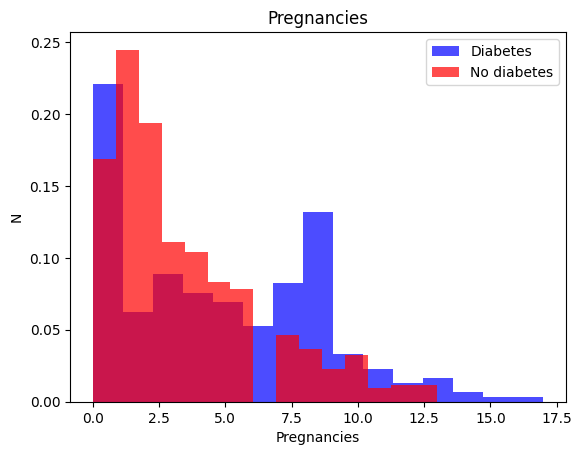

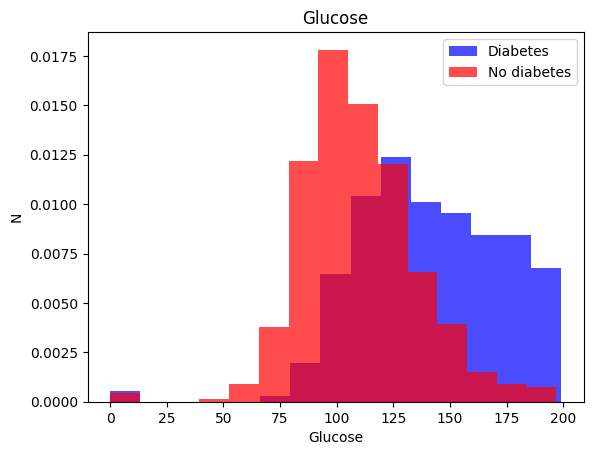

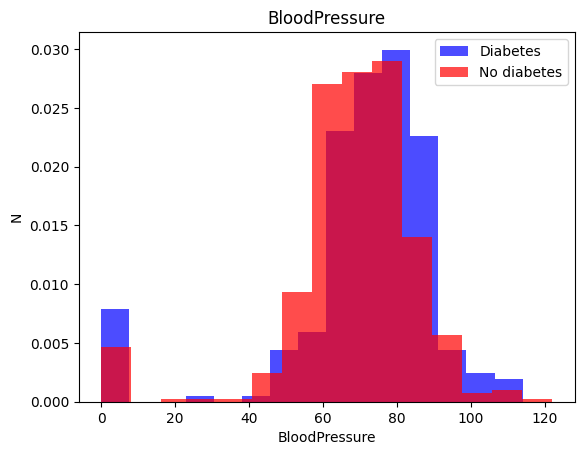

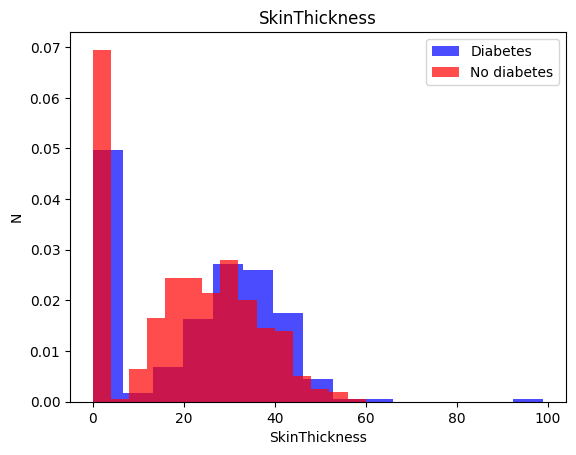

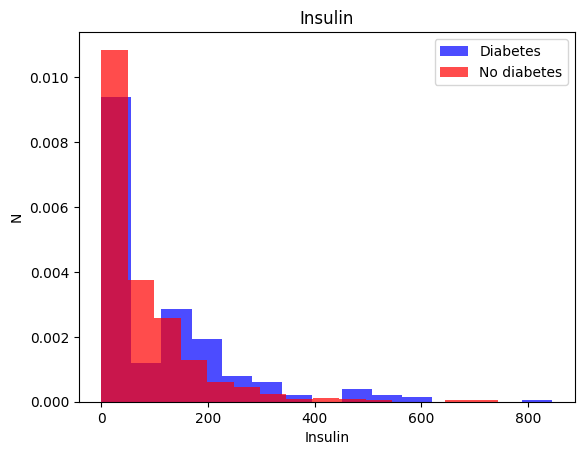

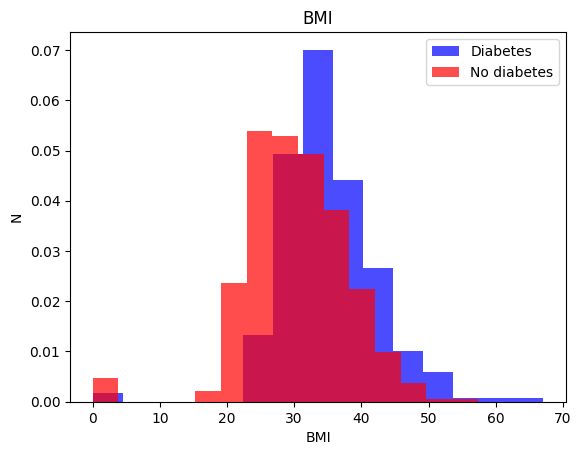

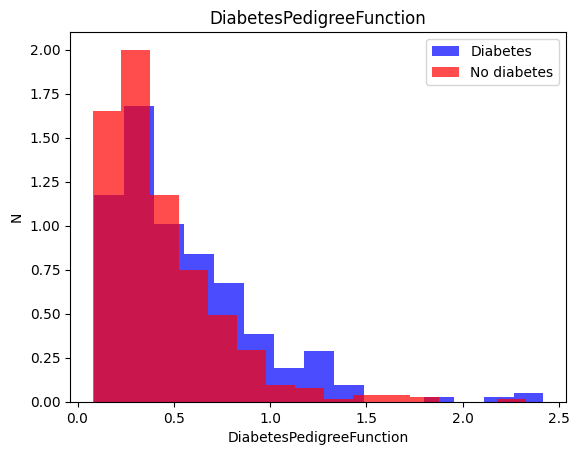

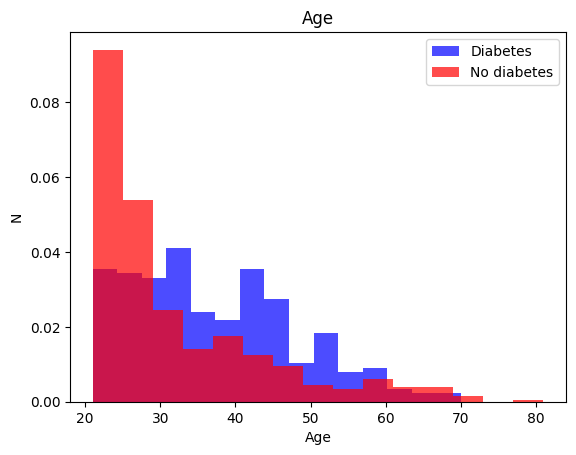

In [25]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i] #글루코스,혈압등 라벨로 지정
  plt.hist(df[df['Outcome']==1][label], color ='blue',label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color="red", label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("N")
  plt.xlabel(label)
  plt.legend()  #위의 참조
  plt.show()

In [26]:
x = df[df.columns[:-1]].values #array 보여줌
y = df[df.columns[-1]].values

In [28]:
x_train, x_temp, y_train, y_temp =train_test_split(x,y, test_size=0.4, random_state=0) #60% 트레이닝,20% 테스트 20%validation temp= test
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state= 0)

In [31]:
model= tf.keras.Sequential([
                              tf.keras.layers.Dense(16, activation='relu'), #16 뉴런으로 이뤄짐 layer
                              tf.keras.layers.Dense(16, activation='relu'), #relu x=< 0 --> else 그냥 x
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [37]:
model.evaluate(x_valid, y_valid)
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 5ms/step - loss: 32.4262 - accuracy: 0.3182


[32.42622375488281, 0.3181818127632141]